Import Modules

In [1]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

Checking Original Image and Annotation

In [ ]:
textLocation = 'Labels/'
imageLocation = 'Training/'
for i in range(5):
  newLocation = imageLocation + str(i) + '.jpg'
  newTextLocation = textLocation + str(i) + '.txt'
  image = imageio.imread(newLocation)
  f = open(newTextLocation, "r")
  values = f.readline()
  splitted = values.split()
  xMin = int(splitted[0])
  yMin = int(splitted[1])
  xMax = int(splitted[2])
  yMax = int(splitted[3])
  bbs = BoundingBoxesOnImage([
  BoundingBox(x1=xMin, x2=xMax, y1=yMin, y2=yMax)
  ], shape=image.shape)
  #image_aug, bbs_aug = rotate(image=image, bounding_boxes=bbs)
  ia.imshow(bbs.draw_on_image(image, size=2))
  
  
  print(newLocation)

Annotation Line Counter

In [6]:
f = open("Labels/100001.txt", "r")
line_count = 0
for line in f:
    if line != "\n":
        line_count += 1


print("Total Line:",line_count)


f.close()
f = open("Labels/100001.txt", "r")


while line_count > 0:
    print(f.readline())
    line_count -= 1

f.close()

Total Line: 2
270 186 303 239

37 176 123 256


This is the main code. Generates Augmented Images with Annotation

Total Line: 2


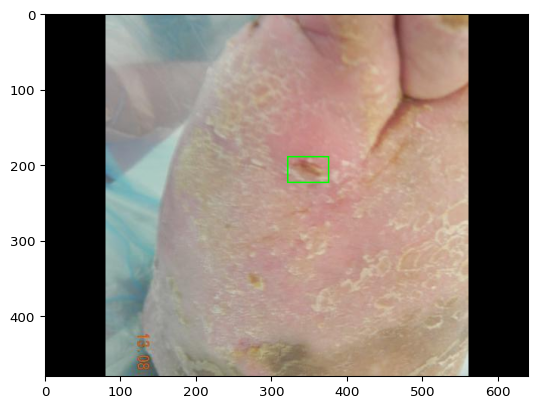

BB 0: (270.0000, 186.0000, 303.0000, 239.0000) -> (321.0000, 190.0000, 374.0000, 223.0000)
Augmented Value: 321.0 190.0 374.0 223.0


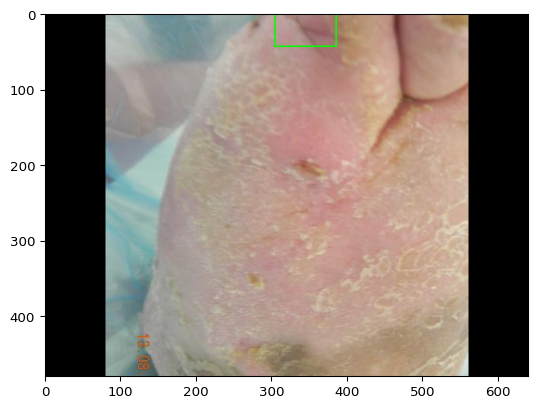

BB 0: (37.0000, 176.0000, 123.0000, 256.0000) -> (304.0000, -43.0000, 384.0000, 43.0000)
Augmented Value: 304.0 -43.0 384.0 43.0
Total Line: 1


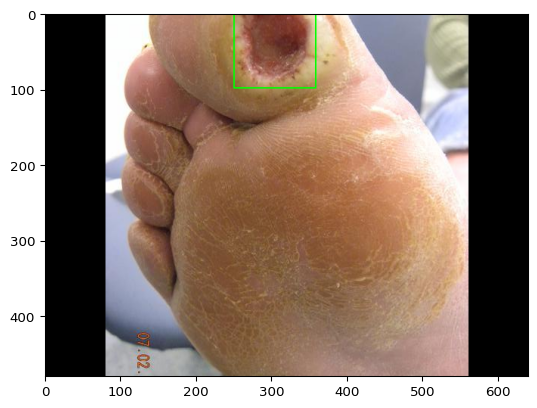

BB 0: (57.0000, 203.0000, 178.0000, 310.0000) -> (250.0000, -23.0000, 357.0000, 98.0000)
Augmented Value: 250.0 -23.0 357.0 98.0
Total Line: 1


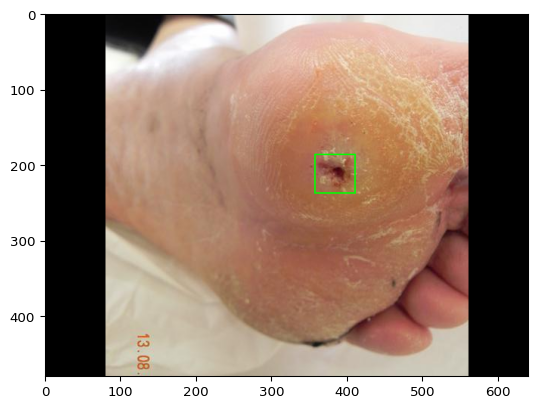

BB 0: (267.0000, 151.0000, 317.0000, 203.0000) -> (357.0000, 187.0000, 409.0000, 237.0000)
Augmented Value: 357.0 187.0 409.0 237.0
Total Line: 1


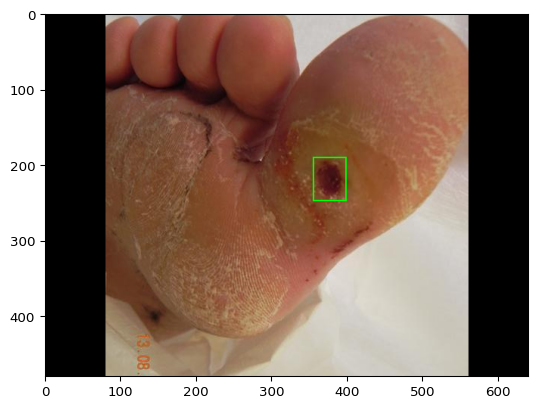

BB 0: (271.0000, 163.0000, 327.0000, 205.0000) -> (355.0000, 191.0000, 397.0000, 247.0000)
Augmented Value: 355.0 191.0 397.0 247.0
Total Line: 1


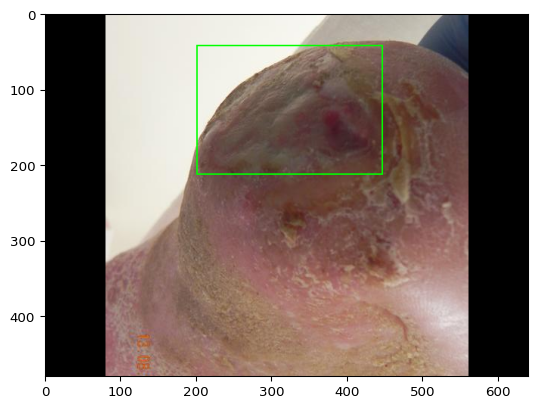

BB 0: (123.0000, 115.0000, 292.0000, 359.0000) -> (201.0000, 43.0000, 445.0000, 212.0000)
Augmented Value: 201.0 43.0 445.0 212.0


In [7]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

imageLocation = 'Training/'
imageDestination = 'Augmented Image/'
textLocation = 'Labels/'
textDestination = 'Augmented Label/'

for i in range(5):
  newLocation = imageLocation + str(i) + '.jpg'
  newDestination = imageDestination + str(i) + '_Rotate.jpg'
  image = imageio.imread(newLocation)
  rotate = iaa.Affine(rotate=90)
  rotated_image=rotate.augment_image(image)
  imageio.imwrite(newDestination,rotated_image)
  image1 = imageio.imread(newDestination)
  newTextLocation = textLocation + str(i) + '.txt'
  textLabel = textDestination + str(i) + '_Rotate.txt'
   
  # This Part Counts Number of Annotations in a Single txt
  f = open(newTextLocation, "r")
  line_count = 0 
  for line in f:
    if line != "\n":
        line_count += 1

  print("Total Line:",line_count) 
  f.close() # Annotation Count Ends

  f = open(newTextLocation, "r")
  while line_count > 0:
    values = f.readline()
    splitted = values.split()
    xMin = int(splitted[0])
    yMin = int(splitted[1])
    xMax = int(splitted[2])
    yMax = int(splitted[3])
    bbs = BoundingBoxesOnImage([
    BoundingBox(x1=xMin, x2=xMax, y1=yMin, y2=yMax)
    ], shape=image.shape)
    image_aug, bbs_aug = rotate(image=image, bounding_boxes=bbs)
    ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))

    for i in range(len(bbs.bounding_boxes)):
      before = bbs.bounding_boxes[i]
      after = bbs_aug.bounding_boxes[i]
    
      print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
          i,
          before.x1, before.y1, before.x2, before.y2,
          after.x1, after.y1, after.x2, after.y2)
      )
    line_count -= 1

    newXmin = str(after.x1)
    newYmin = str(after.y1)
    newXmax = str(after.x2)
    newYmax = str(after.y2)
    
    print("Augmented Value: " +newXmin+ " " +newYmin+ " " +newXmax+ " " +newYmax)
    
    if os.path.isfile(textLabel):
          #print('multiple file: '+label)
          with open(textLabel, 'a') as fd:
              fd.write(f'\n{newXmin+ " " +newYmin+ " " +newXmax+ " " +newYmax}')
              
    else:
          with open(textLabel, 'x') as fd1:
              fd1.write(newXmin+ " " +newYmin+ " " +newXmax+ " " +newYmax)
              
         
    
    
  f.close()